In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder



In [2]:
# Load the dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play Golf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)


In [3]:

# EDA: Overview of the dataset
print("Dataset Overview:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nClass Distribution:")
print(df['Play Golf'].value_counts())



Dataset Overview:
    Outlook Temperature Humidity  Windy Play Golf
0     Sunny         Hot     High  False        No
1     Sunny         Hot     High   True        No
2  Overcast         Hot     High  False       Yes
3      Rain        Mild     High  False       Yes
4      Rain        Cool   Normal  False       Yes

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   Play Golf    14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes
None

Class Distribution:
Yes    9
No     5
Name: Play Golf, dtype: int64


In [4]:
# Encode categorical features
encoder = LabelEncoder()
for column in ['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play Golf']:
    df[column] = encoder.fit_transform(df[column])



In [5]:
df

,Outlook,Temperature,Humidity,Windy,Play Golf
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [6]:
# Define features and target
X = df.drop('Play Golf', axis=1)
y = df['Play Golf']



In [7]:
# Train a Decision Tree classifier
clf = DecisionTreeClassifier( max_depth=3,random_state=42)
clf.fit(X, y)



DecisionTreeClassifier(max_depth=3, random_state=42)

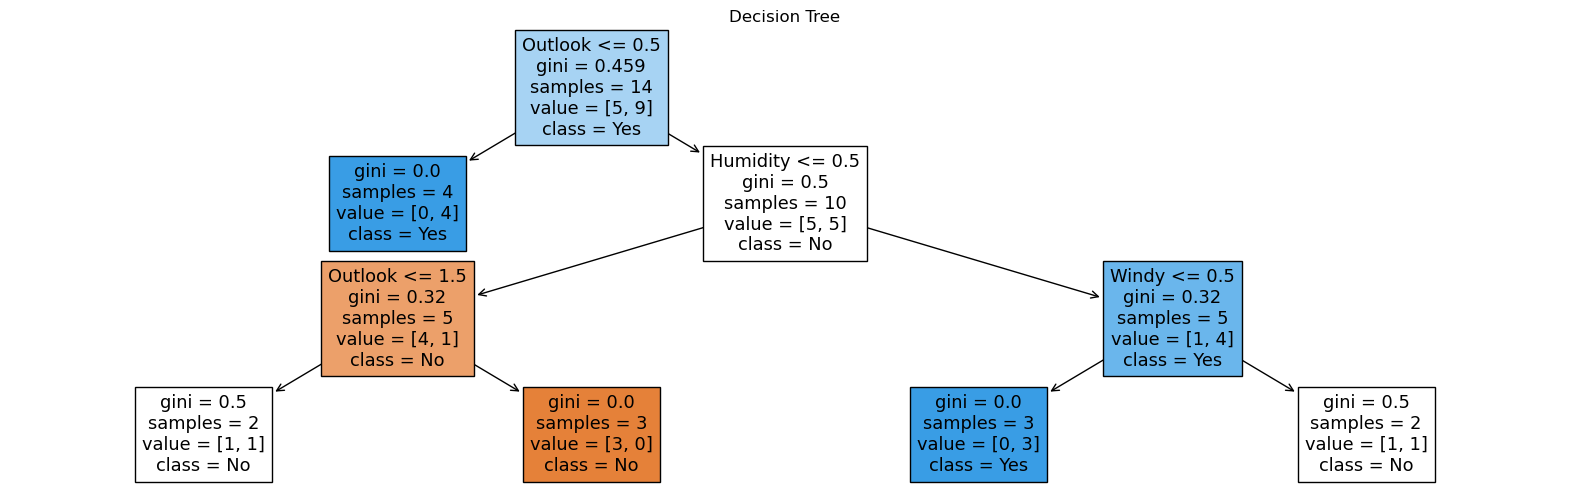

In [8]:
# Visualize the Decision Tree
plt.figure(figsize=(20,6))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree")
plt.show()



In [9]:
# Make predictions
y_pred = clf.predict(X)






In [10]:
# Model Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))


Confusion Matrix:
[[5 0]
 [2 7]]


In [11]:
print("\nClassification Report:")
print(classification_report(y, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.78      0.88         9

    accuracy                           0.86        14
   macro avg       0.86      0.89      0.85        14
weighted avg       0.90      0.86      0.86        14


Accuracy Score:
0.8571428571428571


In [12]:
new_data = pd.DataFrame({
    'Outlook': ['Sunny', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Cool', 'Mild'],
    'Humidity': ['High', 'Normal', 'High'],
    'Windy': [True, False, True]
})

In [13]:
# Encode the new data using the same encoder
for column in ['Outlook', 'Temperature', 'Humidity', 'Windy']:
    new_data[column] = encoder.fit_transform(new_data[column])  # Apply encoding




In [14]:
# Predict the target for the new data
predictions = clf.predict(new_data)



In [15]:
# Decode the predictions back to original class labels
predicted_classes = encoder.inverse_transform(predictions)

# Show results


In [16]:
print("New Data Predictions:")
for i, pred in enumerate(predicted_classes):
    print(f"Data Point {i+1}: Predicted Play Golf = {pred}")

New Data Predictions:
Data Point 1: Predicted Play Golf = False
Data Point 2: Predicted Play Golf = True
Data Point 3: Predicted Play Golf = False
